# <p><center style="font-family:newtimeroman;font-size:180%;">Feature & ML</center></p>
### Table of contents:
* [Import Libraries](#1)
* [Read Data](#2)
* [FindContours](#3)
* [Visualization](#4)
* [Splitting Data](#5)
* [Feature Extractions](#6)
* [ML Model](#7)
* [Check Model](#8)
* [Task](#9)

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd 
import numpy as np 
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from skimage import exposure

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
def READ_RGB(path):
    image=cv2.imread(path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
def READ_GRAY(path):
    image=cv2.imread(path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
def READ_BINARY(path):
    image=READ_GRAY(path)
    ret,image=cv2.threshold(image,0,255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    return image
def Data(path):
    images=[]
    labels=[]
    for class_ in tqdm(os.listdir(path)):
        sub_path=os.path.join(path,class_)
        for image in os.listdir(sub_path):
            images.append(os.path.join(sub_path,image))
            labels.append(class_)
    df=pd.DataFrame({'images':images,'Labels':labels})
    return df

In [3]:
data_df=Data('Shapes')
data_df

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 117.24it/s]


,images,Labels
0,Shapes\circle\0.png,circle
1,Shapes\circle\1.png,circle
2,Shapes\circle\10.png,circle
3,Shapes\circle\100.png,circle
4,Shapes\circle\1000.png,circle
...,...,...
15065,Shapes\triangle\995.png,triangle
15066,Shapes\triangle\996.png,triangle
15067,Shapes\triangle\997.png,triangle
15068,Shapes\triangle\998.png,triangle


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">FindContours </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [4]:
def findContours(binary_image,simple=False):
    if simple:
        contours,h=cv2.findContours(binary_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours,h=cv2.findContours(binary_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    return contours

**<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization</p>
<a class="btn" href="#home">Tabel of Contents</a>

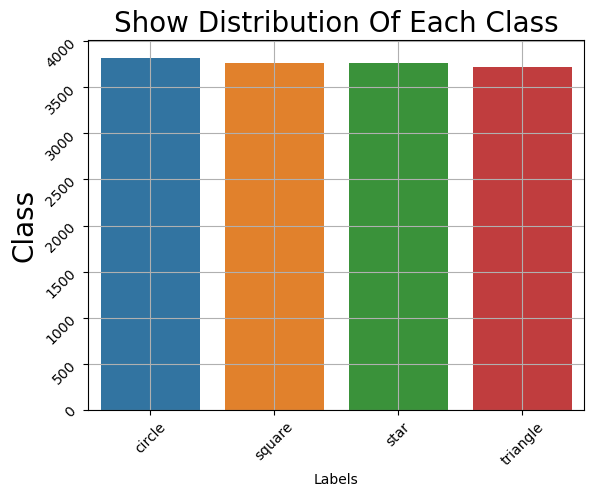

In [5]:
sns.countplot(x=data_df['Labels'])
plt.title('Show Distribution Of Each Class',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.ylabel('Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

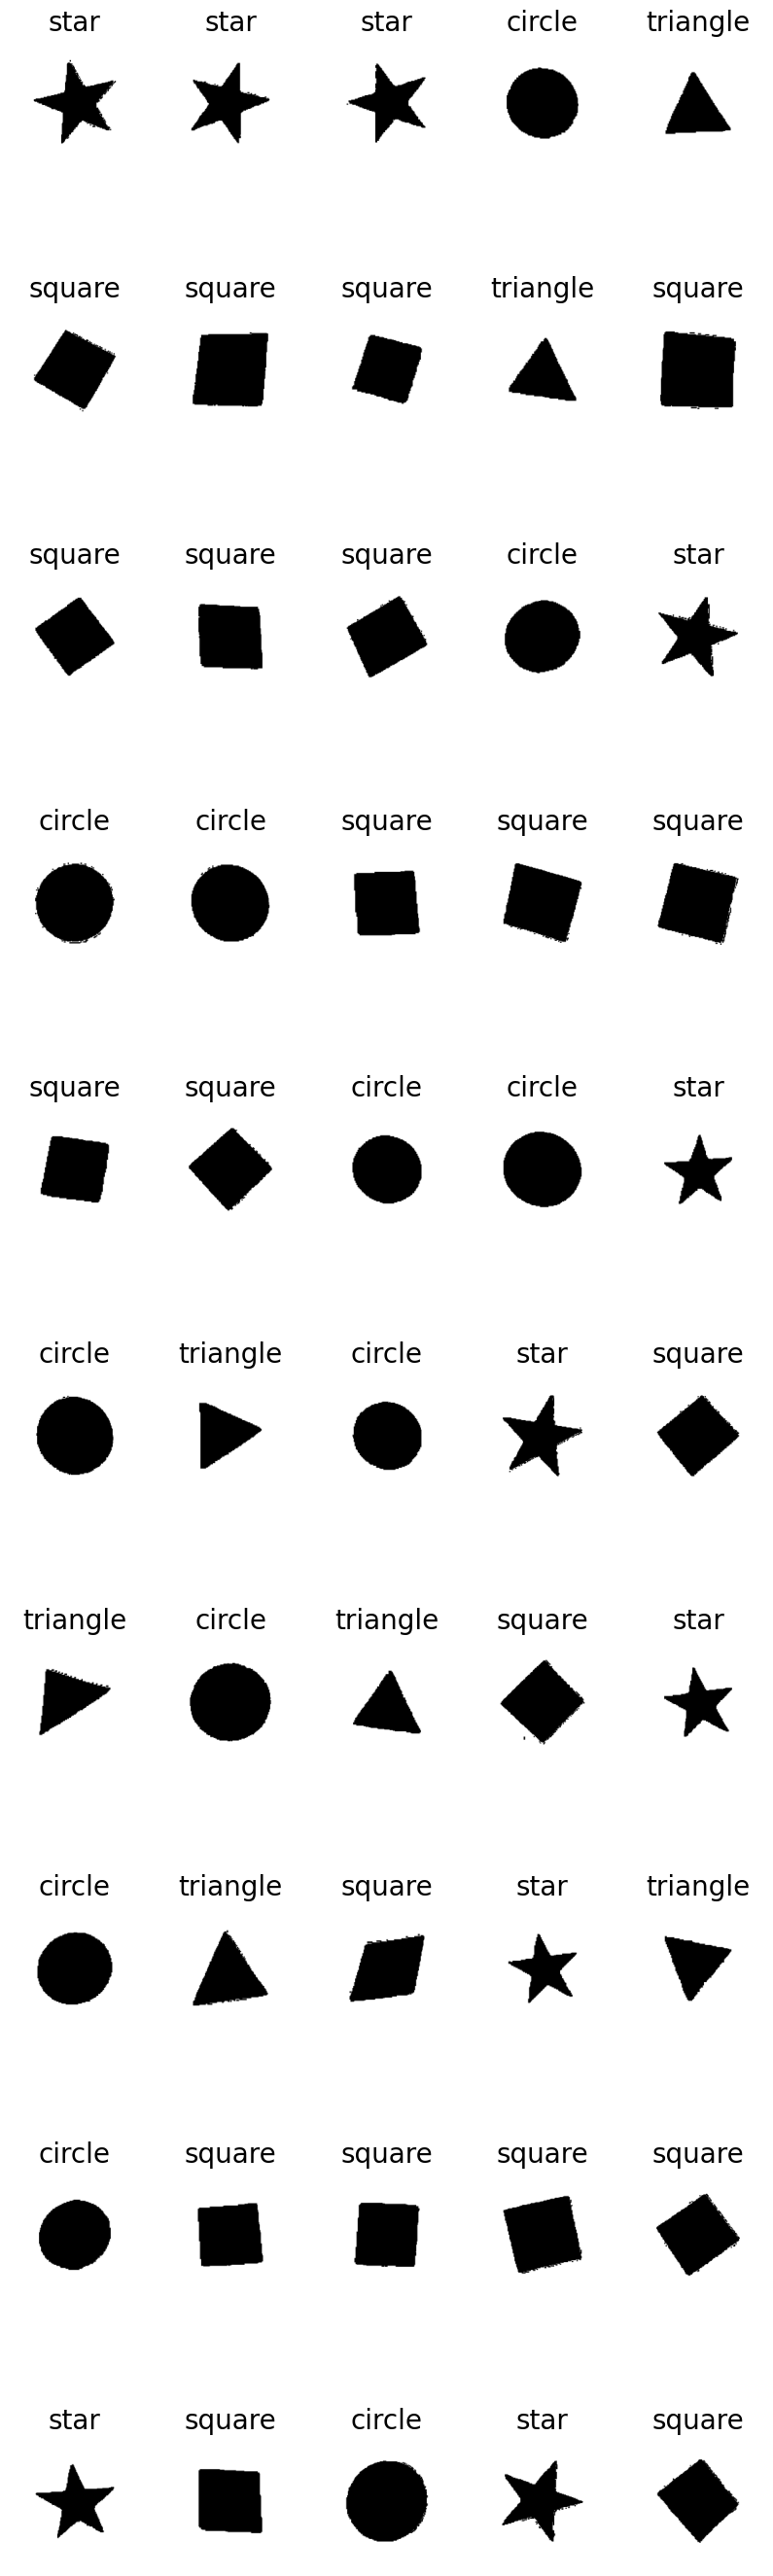

In [6]:
plt.figure(figsize=(10,35))
for n,i in enumerate(np.random.randint(0,len(data_df),50)):
    plt.subplot(10,5,n+1)
    img=READ_RGB(data_df['images'][i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(data_df['Labels'][i],fontsize=20)

**<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Splitting Data</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_df['images'], data_df['Labels'], test_size=0.3, random_state=42,stratify=data_df['Labels'],shuffle=True)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

In [8]:
df_train

,image,label
3655,Shapes\circle\940.png,0
8342,Shapes\star\168.png,2
5080,Shapes\square\2131.png,1
5584,Shapes\square\2586.png,1
2346,Shapes\circle\3109.png,0
...,...,...
12186,Shapes\triangle\1750.png,3
13132,Shapes\triangle\2601.png,3
4411,Shapes\square\153.png,1
5522,Shapes\square\253.png,1


In [9]:
df_test

,image,label
14706,Shapes\triangle\671.png,3
1484,Shapes\circle\2333.png,0
1824,Shapes\circle\264.png,0
12367,Shapes\triangle\1913.png,3
13159,Shapes\triangle\2626.png,3
...,...,...
12679,Shapes\triangle\2194.png,3
14650,Shapes\triangle\620.png,3
14141,Shapes\triangle\351.png,3
11470,Shapes\triangle\1105.png,3


**<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Feature Extractions</p>
<a class="btn" href="#home">Tabel of Contents</a>
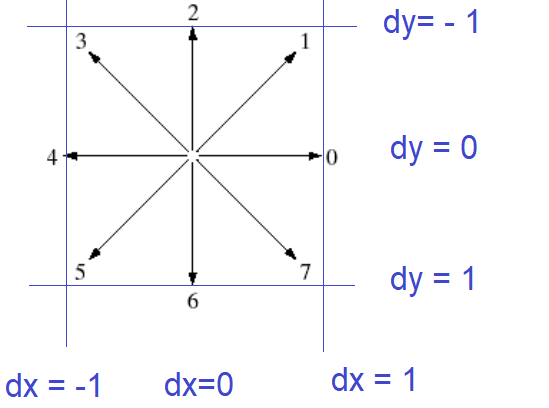

In [10]:
chain_table = {
(1, 0): 0,
(1, -1): 1,
(0, -1): 2,
(-1, -1): 3,
(-1, 0): 4,
(-1, 1): 5,
(0, 1): 6,
(1, 1): 7
}

In [11]:
def Feature(images):
    X=np.zeros((len(images),8))
    for x in tqdm(range(len(images))):
        image=READ_BINARY(images.iloc[x])
        best_contours=findContours(image)
        best_contours=max(best_contours,key=cv2.contourArea)
        hist = np.zeros((8,))
        for i in range(len(best_contours)-1):
            pt1 = best_contours[i][0]
            pt2 = best_contours[i+1][0]
            dx = pt2[0] - pt1[0]
            dy = pt2[1] - pt1[1]
            code = chain_table[(dx, dy)]
            hist[code] += 1
        hist=hist/hist.sum()
        X[x]=hist
    return X

In [12]:
X_train_feature=Feature(df_train['image'])
X_train_feature

100%|██████████████████████████████████████████████████████████████████████████| 10549/10549 [00:09<00:00, 1163.78it/s]


array([[0.19414894, 0.06914894, 0.14893617, ..., 0.06648936, 0.16755319,
        0.07978723],
       [0.15345269, 0.09462916, 0.16112532, ..., 0.0511509 , 0.19693095,
        0.0741688 ],
       [0.14330218, 0.12461059, 0.11214953, ..., 0.105919  , 0.16199377,
        0.09657321],
       ...,
       [0.16897507, 0.07756233, 0.16620499, ..., 0.08033241, 0.16620499,
        0.08864266],
       [0.12303665, 0.15706806, 0.09424084, ..., 0.16753927, 0.10732984,
        0.12041885],
       [0.2987013 , 0.02272727, 0.13961039, ..., 0.08766234, 0.22077922,
        0.        ]])

In [13]:
X_test_feature=Feature(df_test['image'])
X_test_feature

100%|████████████████████████████████████████████████████████████████████████████| 4521/4521 [00:03<00:00, 1162.60it/s]


array([[0.12269939, 0.06134969, 0.2607362 , ..., 0.08588957, 0.09815951,
        0.13803681],
       [0.16352201, 0.0754717 , 0.16037736, ..., 0.05660377, 0.18238994,
        0.09119497],
       [0.16836735, 0.09183673, 0.16581633, ..., 0.08928571, 0.16836735,
        0.07397959],
       ...,
       [0.18610422, 0.08684864, 0.08933002, ..., 0.02729529, 0.27295285,
        0.0471464 ],
       [0.18717949, 0.01538462, 0.27948718, ..., 0.12307692, 0.07692308,
        0.12051282],
       [0.16011236, 0.09831461, 0.15168539, ..., 0.11235955, 0.14325843,
        0.09550562]])

**<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">ML Model</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [14]:
RandomForestClassifierModel=RandomForestClassifier(criterion='gini',n_estimators=400,max_depth=400,random_state=42)
RandomForestClassifierModel.fit(X_train_feature,df_train['label'])

RandomForestClassifier(max_depth=400, n_estimators=400, random_state=42)

In [15]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train_feature,df_train['label']))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test_feature,df_test['label']))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.9531077195310772


In [16]:
y_pred=RandomForestClassifierModel.predict(X_test_feature)

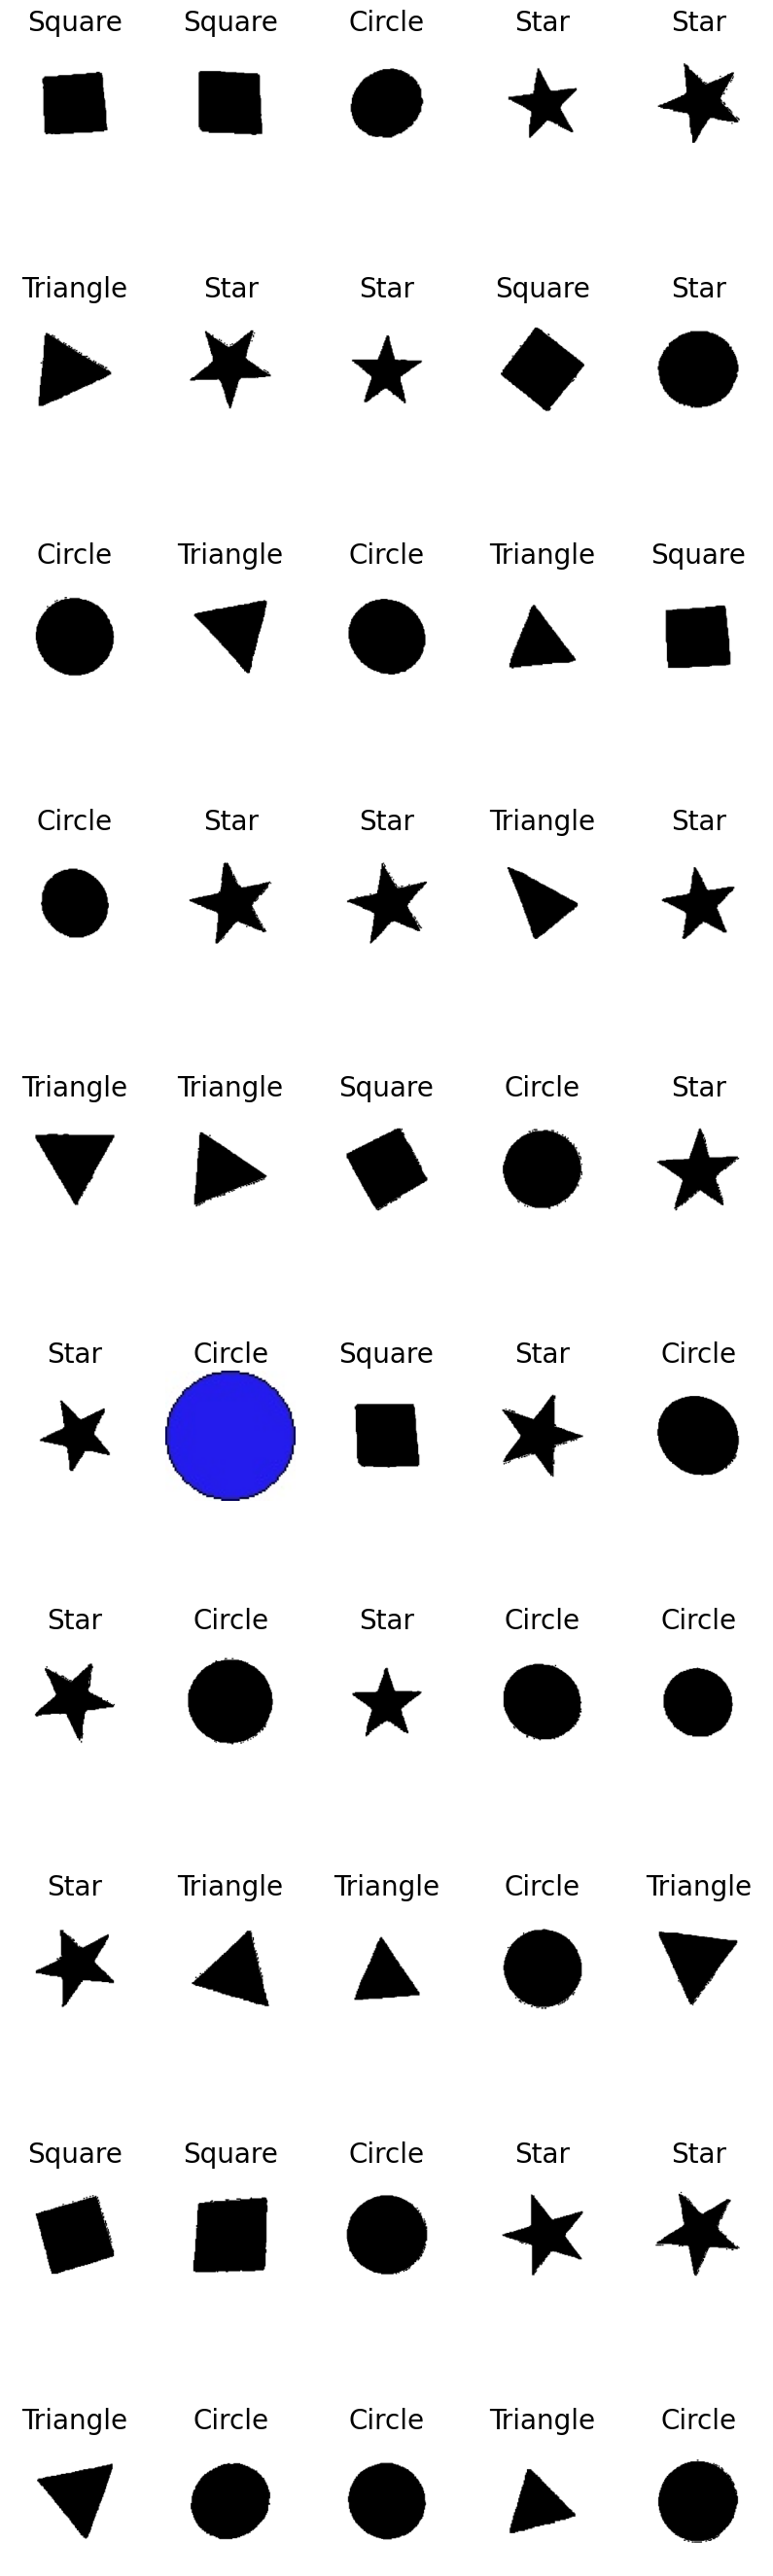

In [17]:
names=['Circle','Square','Star','Triangle']
plt.figure(figsize=(10,35))
for n,i in enumerate(np.random.randint(0,len(X_test_feature),50)):
    plt.subplot(10,5,n+1)
    img=READ_RGB(df_test['image'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(names[y_pred[i]],fontsize=20)

**<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Check Model</p>
<a class="btn" href="#home">Tabel of Contents</a>

array([[1101,   19,   26,    0],
       [  87,  993,   50,    0],
       [  19,   11, 1099,    0],
       [   0,    0,    0, 1116]], dtype=int64)

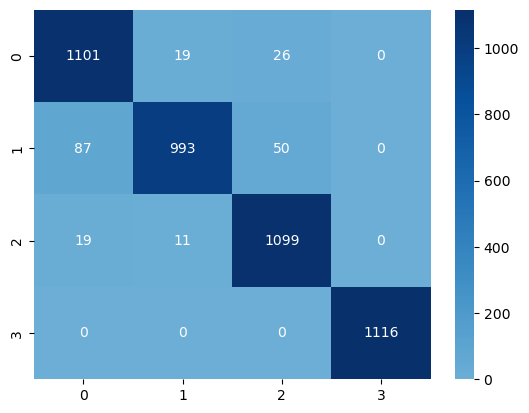

In [18]:
CM = confusion_matrix(df_test['label'], y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
CM

In [19]:
ClassificationReport = classification_report(df_test['label'],y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.91      0.96      0.94      1146
           1       0.97      0.88      0.92      1130
           2       0.94      0.97      0.95      1129
           3       1.00      1.00      1.00      1116

    accuracy                           0.95      4521
   macro avg       0.95      0.95      0.95      4521
weighted avg       0.95      0.95      0.95      4521



**<a id="9"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Task</p>
<a class="btn" href="#home">Tabel of Contents</a>

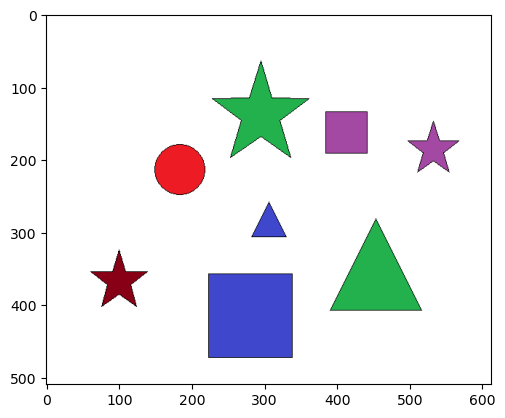

In [20]:
task_image=READ_RGB('shapes.png')
plt.imshow(task_image)
plt.show()

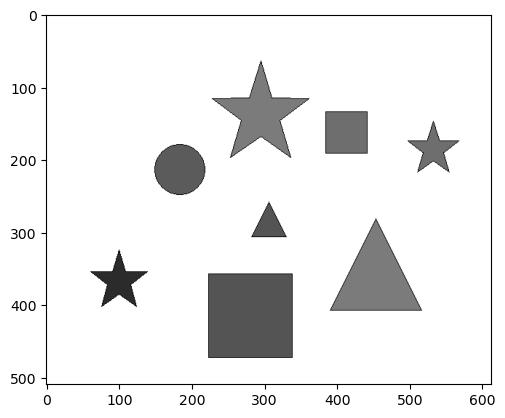

In [21]:
task_image_gray=READ_GRAY('shapes.png')
plt.imshow(task_image_gray,cmap='gray')
plt.show()

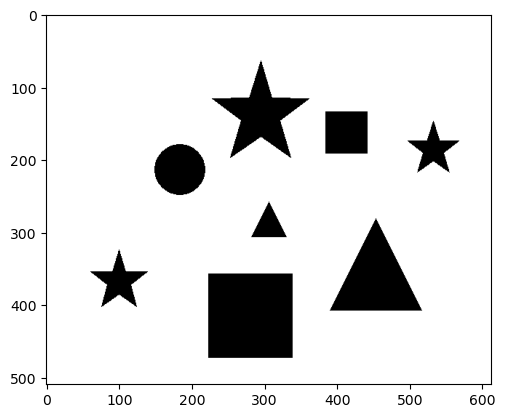

In [22]:
task_image_binary=READ_BINARY('shapes.png')
plt.imshow(task_image_binary,cmap='binary')
plt.show()

In [23]:
contours_t=findContours(task_image_binary,simple=True)
len(contours_t)

8

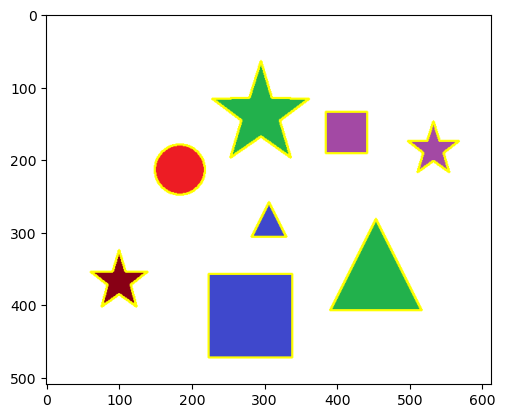

In [24]:
binary=task_image.copy()
cv2.drawContours(binary,contours_t,-1,(255,255,0),2)
plt.imshow(binary)
plt.show()

In [25]:
def feature_image(img):
    best_contours=findContours(img)
    best_contours=max(best_contours,key=cv2.contourArea)
    hist = np.zeros((8,))
    for i in range(len(best_contours)-1):
        pt1 = best_contours[i][0]
        pt2 = best_contours[i+1][0]
        dx = pt2[0] - pt1[0]
        dy = pt2[1] - pt1[1]
        code = chain_table[(dx, dy)]
        hist[code] += 1
    hist=hist/hist.sum()
    return hist

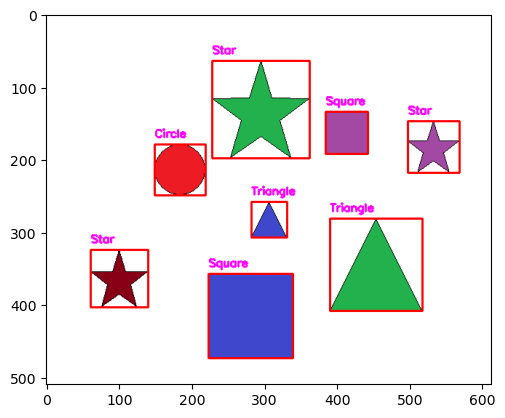

In [26]:
task_image_copy=task_image.copy()
for contour in contours_t:
    x, y, w, h = cv2.boundingRect(contour)
    im=task_image_binary[y:y+h, x:x+w]
    feature_t=feature_image(im)
    pred=RandomForestClassifierModel.predict([feature_t])
    cv2.rectangle(task_image_copy, (x, y), (x + w, y + h), (255,0, 0), 2)
    cv2.putText(task_image_copy,names[int(pred)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
plt.imshow(task_image_copy)
plt.show()    

In [27]:
cv2.imwrite('output_task.jpg',task_image_copy)

True